Restaurant Data:  
- Name: Name of Restaurants  
- Links: URL Links of Restaurants  
- Cost: Per person estimated cost of dining  
- Collection: Tagging of Restaurants w.r.t. Zomato categories  
- Cuisines: Cuisines served by restaurants  
- Timings: Restaurant timings  

Review Data:  
- Reviewer: Name of the reviewer  
- Review: Review text  
- Rating: Rating provided
- MetaData: Reviewer metadata - Number of reviews and followers  
- Time: Date and Time of Review  
- Pictures: Number of pictures posted with review  

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [135]:
restaurant_data = pd.read_csv(r'../data/restaurant_names_metadata.csv')
reviews = pd.read_csv(r'../data/restaurant_reviews.csv')

print(restaurant_data.shape)
print(reviews.shape)

(105, 6)
(10000, 7)


In [136]:
restaurant_data.head(3)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


In [137]:
reviews.head(3)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0


In [138]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [139]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [140]:
print("Any null values in Restaurant Data")
print(restaurant_data.isnull().sum())
print()
print()
print("Any null values in Restaurant Reviews")
print(reviews.isnull().sum())

Any null values in Restaurant Data
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


Any null values in Restaurant Reviews
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Percentage of Data Missing

In [141]:
null_values = restaurant_data.isnull().any(axis=1).sum()
total_values = restaurant_data.shape[0]
print("Missing Rows Restaurant Data: ",(null_values/total_values)*100)

null_values = reviews.isnull().any(axis=1).sum()
total_values = reviews.shape[0]
print("Missing Rows Restaurant Review Data: ",(null_values/total_values)*100)

Missing Rows Restaurant Data:  51.42857142857142
Missing Rows Restaurant Review Data:  0.44999999999999996


Understanding the Variables

In [142]:
print("Features in restaurant data: ", restaurant_data.columns.to_list())
print("Features in reviews", reviews.columns.to_list())

Features in restaurant data:  ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features in reviews ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [143]:
restaurant_data.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [144]:
reviews.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


Data Wrangling

In [145]:
# handle missing values:
# about 50 % of data is not known
restaurant_data.drop("Collections",axis=1,inplace=True)

# droping remaining null values from restaurant data 
reviews.dropna(inplace=True)
restaurant_data.dropna(inplace=True)

print("Missing values in restaurant_data:")
print(restaurant_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())


Missing values in restaurant_data:
Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64 

Missing values in reviews:
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [146]:
# drop duplicate rows
reviews.drop_duplicates(inplace=True)
restaurant_data.drop_duplicates(inplace=True)

In [147]:
df_cuisine = restaurant_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))
print(df_cuisine.head())

cuisine_data = set()
for cuisine in df_cuisine:
    cuisine_data.update(cuisine)
print(f"There are {len(cuisine_data)} total cuisines")
print(cuisine_data)


0    [chinese, continental, kebab, european, southi...
1                      [biryani, northindian, chinese]
2        [asian, mediterranean, northindian, desserts]
3    [biryani, northindian, chinese, seafood, bever...
4    [asian, continental, northindian, chinese, med...
Name: Cuisines, dtype: object
There are 44 total cuisines
{'arabian', 'malaysian', 'european', 'mediterranean', 'goan', 'beverages', 'seafood', 'southindian', 'mithai', 'mughlai', 'lebanese', 'streetfood', 'thai', 'momos', 'fastfood', 'mexican', 'kebab', 'italian', 'cafe', 'sushi', 'indonesian', 'hyderabadi', 'pizza', 'american', 'continental', 'burger', 'fingerfood', 'bakery', 'spanish', 'icecream', 'wraps', 'biryani', 'japanese', 'northindian', 'juices', 'desserts', 'northeastern', 'bbq', 'andhra', 'chinese', 'salad', 'healthyfood', 'modernindian', 'asian'}


In [148]:
restaurant_data['Cuisine_List'] = restaurant_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))
restaurant_data.head(2)

,Name,Links,Cost,Cuisines,Timings,Cuisine_List
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[chinese, continental, kebab, european, southi..."
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,"[biryani, northindian, chinese]"


In [149]:
#  Converting the cost column into "int" data-type
restaurant_data['Cost'] = restaurant_data.Cost.apply(lambda x:x.replace(",","")).astype(int)

In [150]:
restaurant_data.Cost.describe()

count     104.000000
mean      861.057692
std       512.605979
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

In [151]:
restaurant_data.drop(['Links','Cuisines','Timings'],axis=1,inplace=True)
restaurant_data.head(2)

,Name,Cost,Cuisine_List
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"


In [152]:
# replacing non-numerical values in rating with NaN
reviews['Rating'] = pd.to_numeric(reviews['Rating'],errors='coerce')
reviews['Rating'] = reviews['Rating'].fillna(reviews['Rating'].median())

In [153]:
reviews.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [154]:
import re
def extract_data(text):

    review_pattern = r'(\d+) Review'
    follower_pattern = r'(\d+) Follower'

    review_match = re.search(review_pattern,text)
    follower_match = re.search(follower_pattern,text)

    reviews = review_match.group(1) if review_match else 0
    followers = follower_match.group(1) if follower_match else 0

    return [reviews,followers]


In [155]:
reviews[['prev_reviews_count','followers_count']] = reviews.Metadata.apply(extract_data).apply(pd.Series)

In [156]:
reviews.drop(['Metadata'],axis=1,inplace=True)
reviews.head(2)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,prev_reviews_count,followers_count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2


In [157]:
# now we join both the restaurant data with the reviews

df = pd.merge(reviews,restaurant_data,left_on='Restaurant',right_on='Name')
df.drop(['Name'],axis=1,inplace=True)
df.head(2)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,prev_reviews_count,followers_count,Cost,Cuisine_List
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2,800,"[chinese, continental, kebab, european, southi..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2,800,"[chinese, continental, kebab, european, southi..."


In [158]:
print("Total number of Restaurants: ")
len(df.Restaurant.unique())

Total number of Restaurants: 


99

### Experimenting with charts & Finding relation between Variables 

### Univariate Visualization

1) Distribution of Cost, Rating

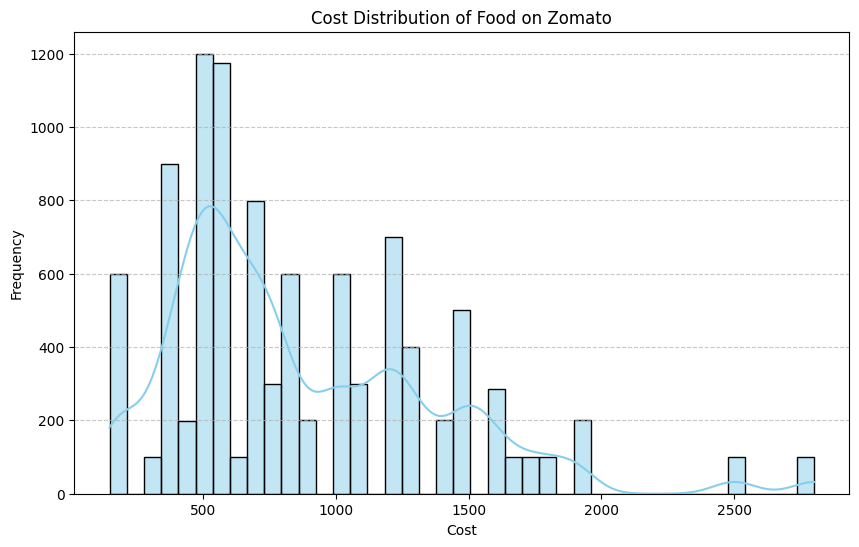


 count    9855.000000
mean      871.491629
std       506.033525
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64


In [159]:
plt.figure(figsize=(10,6))

sns.histplot(data=df,x='Cost',kde=True,color='skyblue')
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.title('Cost Distribution of Food on Zomato')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

print("\n",df.Cost.describe())

- The average cost per person is 871 Rs With a std. deviation of 506 Rs
- Minimum observed cost: 150
- Maximum observed cost: 2800

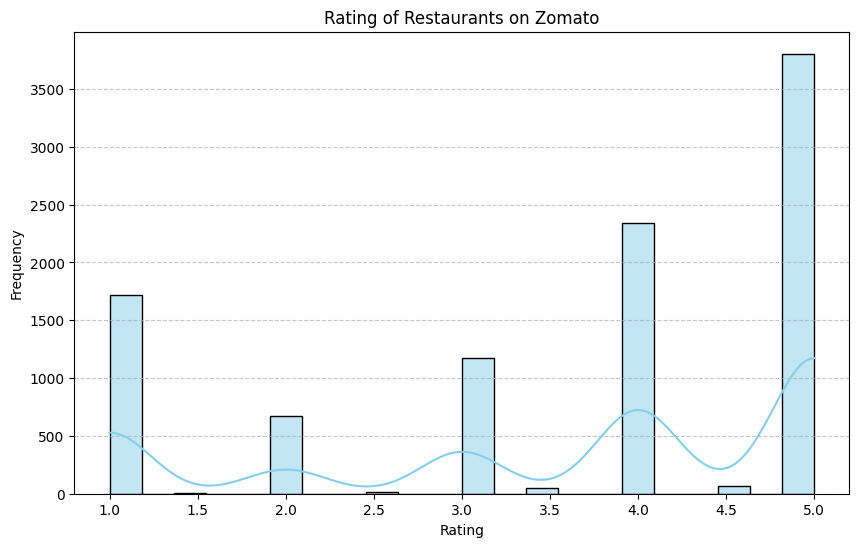


 count    9855.000000
mean        3.603146
std         1.484474
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


In [160]:
plt.figure(figsize=(10,6))

sns.histplot(data=df,x='Rating',kde=True,color='skyblue')
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.title('Rating of Restaurants on Zomato')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

print("\n",df.Rating.describe())

- The average rating is 3.6 indicating a majority of postitive ratings
- Majority about 75 % of the reviews (6000 reviews) tend to have strong opinions about their experiences, either very good or very bad, rather than neutral or average.

2) Most popular cuisines

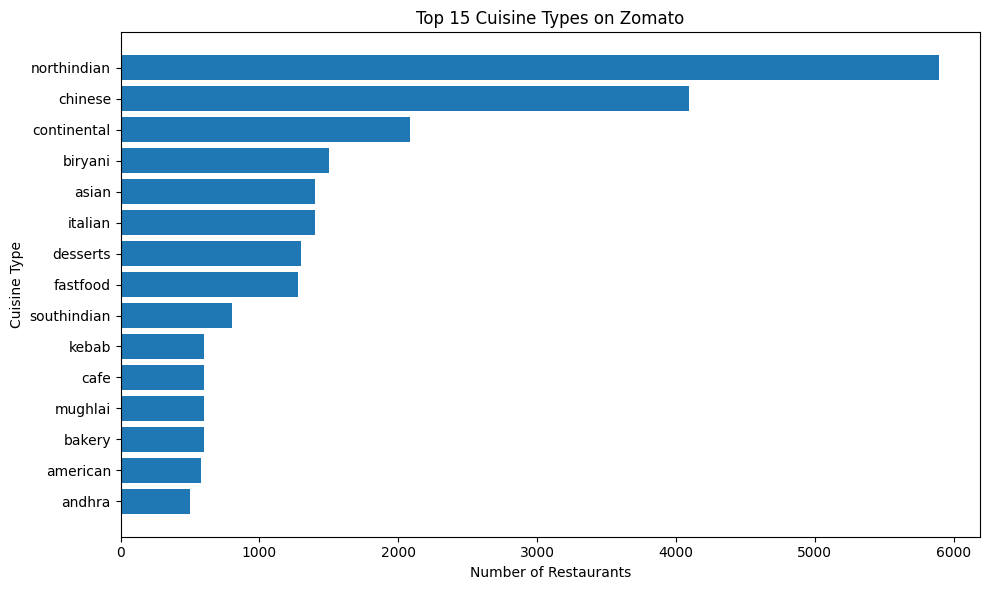

In [161]:
cuisines = []

for cus_list in df.Cuisine_List:
    for cus in cus_list:
        cuisines.append(cus)
    
top_n = 15
cuisine_counts = pd.Series(cuisines).value_counts()
cuisine_counts = cuisine_counts.head(top_n)

plt.figure(figsize=(10,6))
plt.barh(cuisine_counts.index,cuisine_counts.values)

plt.title('Top {} Cuisine Types on Zomato'.format(top_n))
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

3) Restaurant Costs vs Cuisines

Index(['northindian', 'chinese', 'continental', 'biryani', 'asian', 'fastfood',
       'italian', 'desserts', 'southindian', 'bakery', 'mughlai', 'kebab',
       'cafe', 'american', 'mediterranean', 'beverages', 'andhra', 'salad',
       'burger', 'european'],
      dtype='object', name='Cuisine_Type')


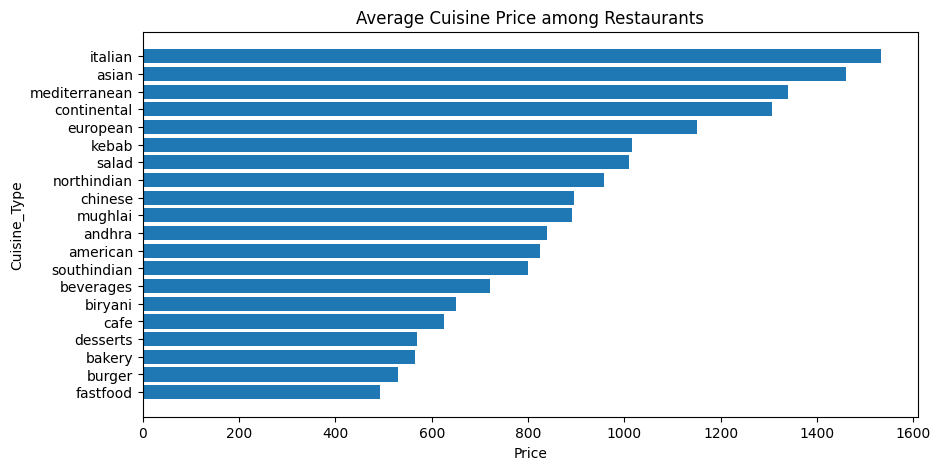

In [162]:
restaurant_data.reset_index(drop=True,inplace=True)

exploded_cuisines = restaurant_data['Cuisine_List'].explode()
exploded_cuisines

cuisine_df = pd.DataFrame({
    'Cuisine_Type': exploded_cuisines, 
    'Cost': restaurant_data['Cost']
})

# print(cuisine_df['Cuisine_Type'].value_counts())
top_20_cuisine = cuisine_df['Cuisine_Type'].value_counts().head(20).index
print(top_20_cuisine)

cuisine_cost_df = cuisine_df[cuisine_df['Cuisine_Type'].isin(top_20_cuisine)]

average_cuisine_cost = cuisine_cost_df.groupby(['Cuisine_Type'])['Cost'].mean().sort_values(ascending=False).reset_index()
average_cuisine_cost

plt.figure(figsize=(10,5))
plt.barh(average_cuisine_cost['Cuisine_Type'],average_cuisine_cost['Cost'])

plt.title("Average Cuisine Price among Restaurants")
plt.xlabel('Price')
plt.ylabel('Cuisine_Type')
plt.gca().invert_yaxis()
plt.show()


- Highest Price cuisine includes italian, asian followed by mediterranean and continental
- Lowest Price cuisine are fastfoods, bakery etc

4. Affordable and Expensive Restaurants

In [163]:
restaurant_data.head()

,Name,Cost,Cuisine_List
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,1300,"[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"[asian, continental, northindian, chinese, med..."


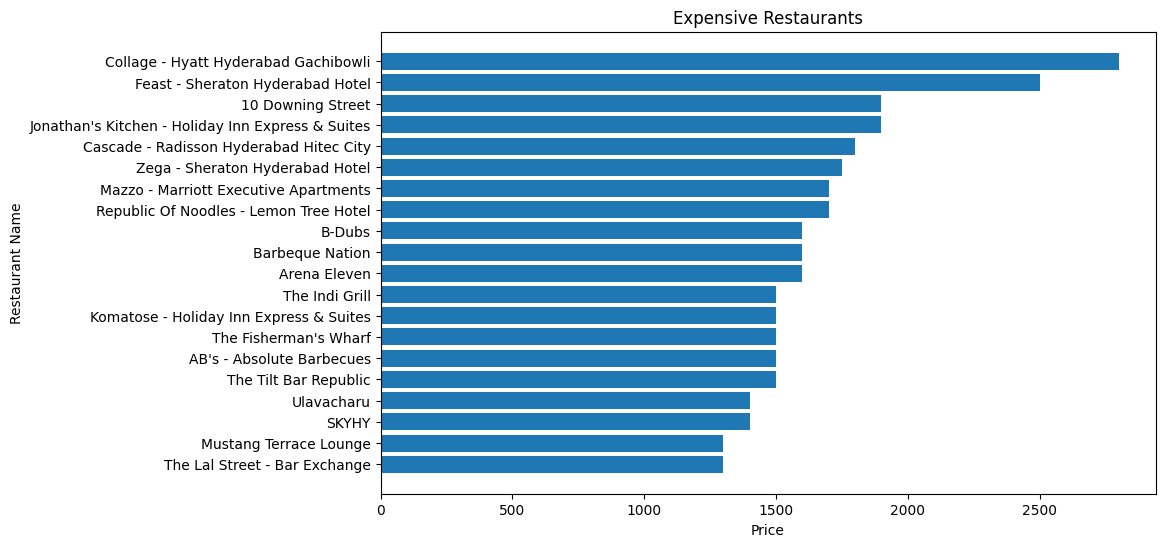

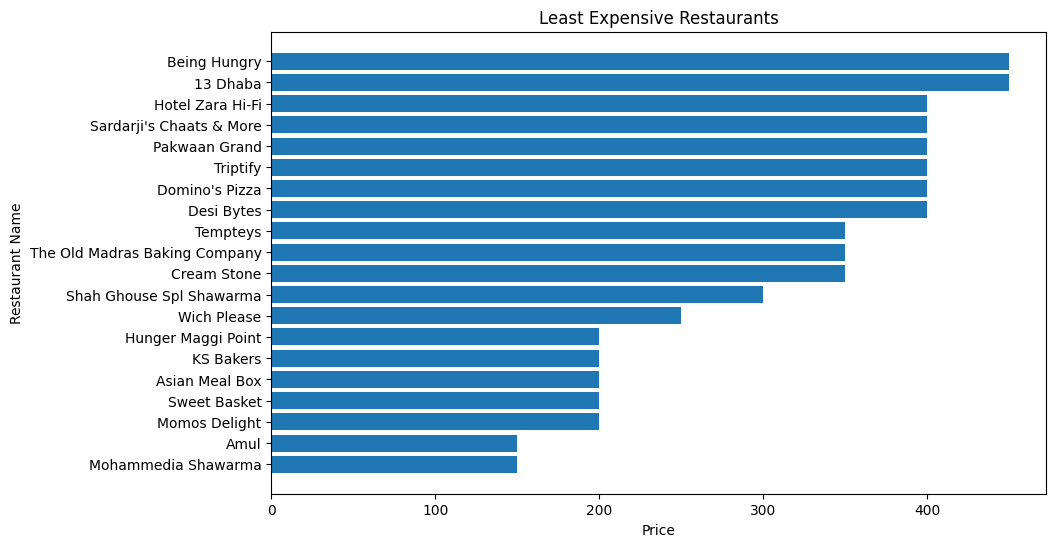

In [164]:
# top 20 expensive and affordable 
top_20_expensive = restaurant_data.sort_values(by='Cost',ascending=False).head(20)
least_expensive = restaurant_data.sort_values(by='Cost',ascending=False).tail(20)

plt.figure(figsize=(10,6))
plt.barh(top_20_expensive['Name'],top_20_expensive['Cost'])
plt.title('Expensive Restaurants')
plt.xlabel('Price')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()

plt.figure(figsize=(10,6))
plt.barh(least_expensive['Name'],least_expensive['Cost'])
plt.title('Least Expensive Restaurants')
plt.xlabel('Price')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()
# top_20_expensive

5. Stats on Affordable & Expensive Restaurants

In [165]:
exp_stat_data = top_20_expensive.Cost.describe()
least_exp_data = least_expensive.Cost.describe()

print("Stats on Expensive Restaurants: ")
print(exp_stat_data)
print()
print("Stats on Least Expensive Restaurants: ")
print(least_exp_data)
print()
print("Conclusion: \n")
print("The expensive restaurants are {} times costlier in comparision to least expensive restaurants".format(exp_stat_data['mean']/least_exp_data['mean']))

Stats on Expensive Restaurants: 
count      20.00000
mean     1687.50000
std       374.82452
min      1300.00000
25%      1500.00000
50%      1600.00000
75%      1762.50000
max      2800.00000
Name: Cost, dtype: float64

Stats on Least Expensive Restaurants: 
count     20.000000
mean     310.000000
std      104.629673
min      150.000000
25%      200.000000
50%      350.000000
75%      400.000000
max      450.000000
Name: Cost, dtype: float64

Conclusion: 

The expensive restaurants are 5.443548387096774 times costlier in comparision to least expensive restaurants


In [166]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,prev_reviews_count,followers_count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2


6. Ratings w.r.t Month/WeekDays

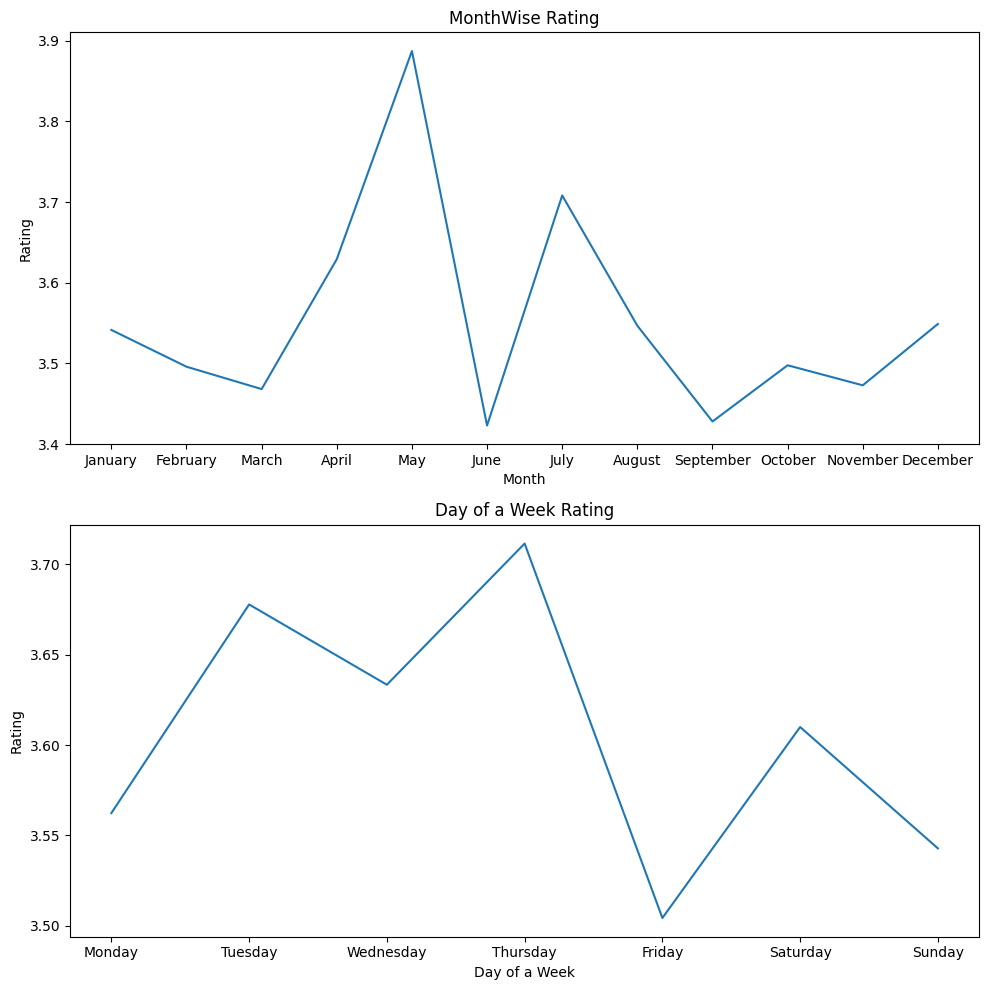

In [167]:
import datetime as dt
reviews['Time'] = pd.to_datetime(reviews['Time'])

reviews['Month'] = reviews['Time'].dt.month
reviews['DayOfWeek'] = reviews['Time'].dt.day_name()

monthly_rating = reviews.groupby('Month')['Rating'].mean() 
weekly_avg_rating = reviews.groupby('DayOfWeek')['Rating'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, axs = plt.subplots(2,1,figsize=(10,10))

axs[0].plot(monthly_rating)
axs[0].set_title('MonthWise Rating')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Rating')
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels([dt.date(2000, m, 1).strftime('%B') for m in range(1, 13)])

axs[1].plot(weekly_avg_rating)
axs[1].set_title('Day of a Week Rating')
axs[1].set_xlabel('Day of a Week')
axs[1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

Observations:

- Highest Average Rating occured in the month of May.  
- Low Rating observed in the month of March, June, suggesting seasonal change impact on ratings.  
- Ratings peak mid week and then decline towards the weekend.  

Business Point of View:  

- The insights could lead to targeted marketing during peak times, quality control measures when lower ratings are expected, and staffing adjustments to ensure service quality during critical hours or days.  

Strategic Point of View:

- Seasonal Adjustments: The variation in monthly ratings could suggest that the restaurants should adjust their offerings or operations seasonally, perhaps offering summer specials or comfort food in colder months.
- Weekly Planning: Understanding that ratings dip over the weekend could imply that customers have higher expectations or that there are operational challenges during these days.




7. Variations of Ratings with Cost

C:\Users\Nitin Flavier\AppData\Local\Temp\ipykernel_26500\4199138306.py:8: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(hue='Cost_Bin',y='Rating',data=df,palette=colors)


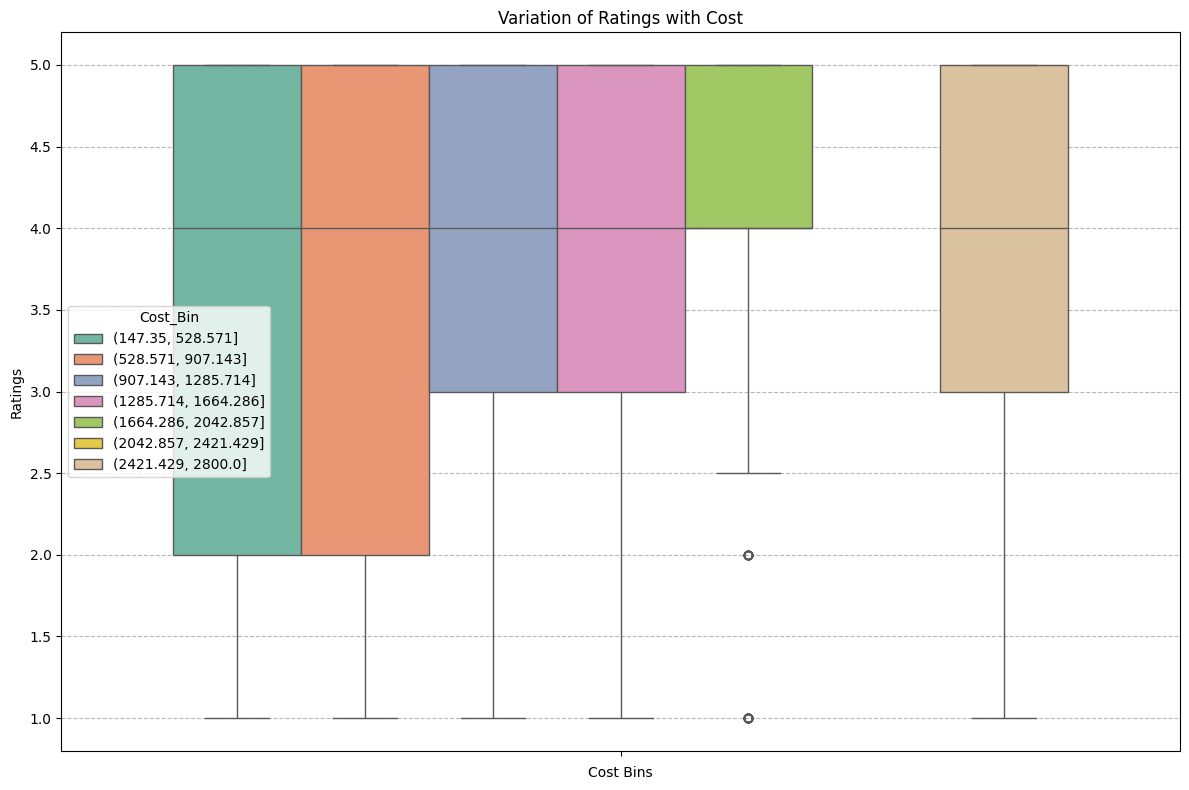

In [168]:
# lets make 7 bins/ranges for cost and compare its rating

df['Cost_Bin'] = pd.cut(df['Cost'], bins=7)

colors = sns.color_palette('Set2')

plt.figure(figsize=(12,8))
sns.boxplot(hue='Cost_Bin',y='Rating',data=df,palette=colors)
plt.xticks(rotation=45)
plt.title('Variation of Ratings with Cost')
plt.xlabel('Cost Bins')
plt.ylabel('Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()  # Ensure the plot is well-fit within the figure
plt.show()


Obervations:
- Higher Cost, Higher Ratings: The highest cost bins shows the high median rating, which could suggest that more expensive restaurants tend to receive better ratings, possibly due to perceived quality, service, or experience.  

- Spread of Ratings for Lower Cost Restaurants:The lowest cost bins have a larger IQR, suggesting more variability in how customers rate lower cost restaurants.  

- Presence of Outliers: There are outliers indicated by the dots outside the main "box" of the box plot. This indicates that there are some restaurants with ratings that are significantly lower than the typical range of ratings for their cost category.

In [169]:
df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,prev_reviews_count,followers_count,Cost,Cuisine_List,Cost_Bin
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2,800,"[chinese, continental, kebab, european, southi...","(528.571, 907.143]"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2,800,"[chinese, continental, kebab, european, southi...","(528.571, 907.143]"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3,800,"[chinese, continental, kebab, european, southi...","(528.571, 907.143]"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1,800,"[chinese, continental, kebab, european, southi...","(528.571, 907.143]"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2,800,"[chinese, continental, kebab, european, southi...","(528.571, 907.143]"


In [170]:
reviews.to_csv(r'../data/restaurant_reviews_upd.csv',index=False)
restaurant_data.to_csv(r'../data/restaurant_detail_upd.csv',index=False)
df.to_csv(r'../data/combined_data.csv',index=False)